# Versuch 251
## Statistik des radioaktiven Zerfalls

## 1. Messung der Zählrohrstatistik

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

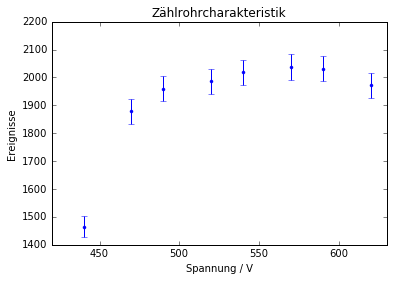

In [27]:
#Zählrohrspannung
U=np.array([440,470,490,520,540,570,590,620])
#gezählte Ereignisse
N=np.array([1465,1878,1959,1986,2018,2037, 2031, 1971])
Fehler_N=np.sqrt(N)

plt.axis([420,630,1400,2200])
plt.errorbar(U,N,Fehler_N,fmt=".")
plt.xlabel('Spannung / V')
plt.ylabel('Ereignisse')
plt.title('Zählrohrcharakteristik')

In [31]:
from scipy.optimize import curve_fit
def linear(x,a,b):
    return a*x+b


popt, pcov=curve_fit(linear, U[2:], N[2:])

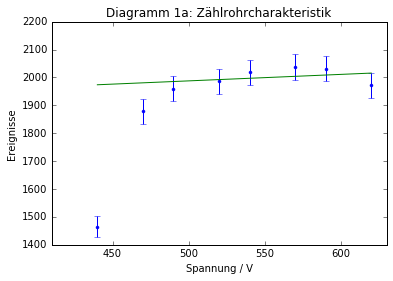

In [29]:
plt.errorbar(U, N, Fehler_N, fmt=".")
plt.axis([410,630,1400,2200])
plt.xlabel('Spannung / V')
plt.ylabel('Ereignisse')
plt.title('Diagramm 1a: Zählrohrcharakteristik')
plt.plot(U, linear(U,*popt))
plt.savefig("Diagramm 1a.pdf", format="pdf", orientation = 'landscape')

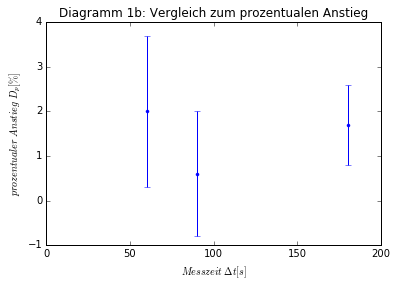

In [30]:
dat = np.array([60,90,180])
y = np.array([2.0, 0.6, 1.7])
yerr = np.array([1.7, 1.4, 0.9])

plt.errorbar(dat,y, yerr = yerr, ls ='none', marker = '.')
plt.xlabel('$Messzeit \ \Delta t [s]$')
plt.ylabel('$prozentualer \ Anstieg \ D_p[\%]$')
plt.title('Diagramm 1b: Vergleich zum prozentualen Anstieg')
plt.xlim(0,200)
plt.savefig("Diagramm 1b.pdf", format="pdf", orientation = 'landscape')

## 3. Auswertung der Daten mit hoher mittlerer Energiezahl

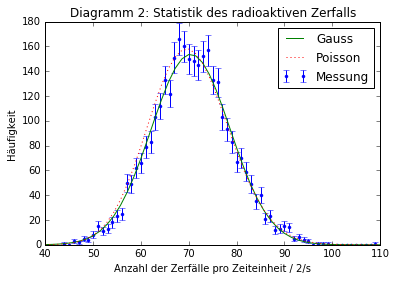

In [37]:
anzahl, haeufigkeit=np.loadtxt("Traub,Senghaas.dat",unpack=True)
fehler = np.sqrt(haeufigkeit)
delta_U=10

a=15
b=-15
from numpy import exp, pi, sqrt
def gaussian(x, A, mu, sig):
    return A/(2*pi*sqrt(sig))*exp(-(x-mu)**2/(2*sig**2))
popt, pcov = curve_fit(gaussian, anzahl[a:b], haeufigkeit[a:b], p0=[1776, 69.3, 8], sigma=fehler[a:b])


from scipy.special import gamma
def poisson(x,A_p,mu_p):
    return A_p*np.exp(-mu_p)*mu_p**x/gamma(x+1)

popt_p, pcov_p = curve_fit(poisson, anzahl[25:-25],
                          haeufigkeit[25:-25], 
                           p0=[2000,75], 
                           sigma=fehler[25:-25])

plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".", label='Messung')
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit / 2/s')
plt.ylabel('Häufigkeit')
plt.ylim(0,180)
plt.title('Diagramm 2: Statistik des radioaktiven Zerfalls')
x=np.linspace(40,110)
plt.plot(x, gaussian(x,*popt), label='Gauss')
plt.plot(x,poisson(x,*popt_p), label='Poisson',linestyle=':')
plt.legend()
plt.savefig("Diagramm 2.pdf", format="pdf", orientation = 'landscape')

In [38]:
print("Gaussfit:")
print("A=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("mu=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1]))
print("sig=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))
print("Poissonfit:")
print("A_p=",popt_p[0], ", Standardfehler=", np.sqrt(pcov_p[0][0]))
print("mu_p=",popt_p[1], ", Standardfehler=", np.sqrt(pcov_p[1][1]))

Gaussfit:
A= 2775.95243492 , Standardfehler= 46.428771456
mu= 70.3877383166 , Standardfehler= 0.177649155017
sig= 8.2690838817 , Standardfehler= 0.151984110026
Poissonfit:
A_p= 3313.85620942 , Standardfehler= 88.9903309653
mu_p= 70.0719102486 , Standardfehler= 0.297984465644


In [39]:
#Gauß
chi2_g=np.sum((gaussian(anzahl[25:-25], *popt)-haeufigkeit[25:-25])**2/fehler[25:-25]**2)
dof_g=len(anzahl[25:-25])-3
chi2_red_g=chi2_g/dof_g
print("chi2_g=", chi2_g)
print("chi2_red_g=",chi2_red_g)

#Poisson:
chi2_p=np.sum((poisson(anzahl[25:-25], *popt_p)-haeufigkeit[25:-25])**2/fehler[25:-25]**2)
dof_p=len(anzahl[25:-25])-2
chi2_red_p=chi2_p/dof_p
print("chi2_p=", chi2_p)
print("chi2_red_p=", chi2_red_p)

chi2_g= 8.17161287724
chi2_red_g= 0.628585605942
chi2_p= 7.75428065962
chi2_red_p= 0.553877189973


In [40]:
from scipy.stats import chi2

#Gauß:
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100

#Poisson
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100
print("Wahrscheinlichkeit Gauß=", prob_g,"%")
print("Wahrscheinlichkeit Poisson=", prob_p,"%")

Wahrscheinlichkeit Gauß= 83.0 %
Wahrscheinlichkeit Poisson= 90.0 %


# 4. Auswertung der Daten mit geringer mittlerer Energiezahl

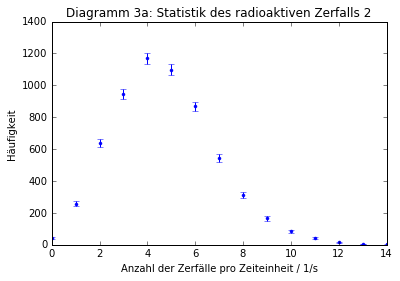

In [41]:
anzahl2, haeufigkeit2=np.loadtxt('Traub,Senghaas_2.dat', unpack=True)
fehler2=np.sqrt(haeufigkeit2)
x2=np.linspace(0,14, 1000)
plt.errorbar(anzahl2, haeufigkeit2, fehler2, fmt=".", label='Messung 2')

plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit / 1/s')
plt.ylabel('Häufigkeit')
plt.title('Diagramm 3a: Statistik des radioaktiven Zerfalls 2')
plt.savefig('Diagramm 3a.pdf', format="pdf", orientation = 'landscape')

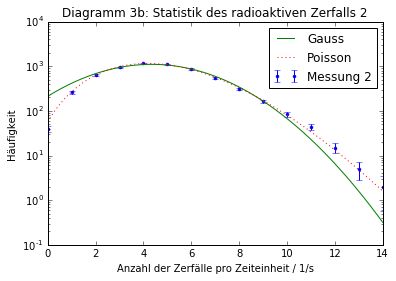

In [42]:
popt2 , pcov2 = curve_fit(gaussian, anzahl2[2:-2],
                          haeufigkeit2[2:-2], 
                           p0=[5000,3.9,1.5], 
                           sigma=fehler2[2:-2])

popt_p2, pcov_p2 = curve_fit(poisson, anzahl2[2:-2],
                          haeufigkeit2[2:-2], 
                           p0=[5000,3.9], 
                           sigma=fehler2[2:-2])

plt.errorbar(anzahl2, haeufigkeit2, fehler2, fmt=".", label='Messung 2')
plt.plot(x2,gaussian(x2,*popt2), label='Gauss')
plt.plot(x2,poisson(x2,*popt_p2), label='Poisson',linestyle=':')

plt.yscale('log')

plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit / 1/s')
plt.ylabel('Häufigkeit')
plt.title('Diagramm 3b: Statistik des radioaktiven Zerfalls 2')
plt.legend()

fig=plt.gcf()
plt.savefig('Diagramm 3b.pdf', format="pdf", orientation = 'landscape')

In [43]:
#Parameter
print("Gaussfit 2:")
print("A=",popt2[0], ", Standardfehler=", np.sqrt(pcov2[0][0]))
print("mu=",popt2[1], ", Standardfehler=", np.sqrt(pcov2[1][1]))
print("sig=",popt2[2], ", Standardfehler=", np.sqrt(pcov2[2][2]))
print("Poissonfit 2:")
print("A_p=",popt_p2[0], ", Standardfehler=", np.sqrt(pcov_p2[0][0]))
print("mu_p=",popt_p2[1], ", Standardfehler=", np.sqrt(pcov_p2[1][1]))

#Gauß
chi2_g2=np.sum((gaussian(anzahl2[2:-2], *popt2)
              -haeufigkeit2[2:-2])**2/fehler2[2:-2]**2)
dof_g2=len(anzahl2[2:-2])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g2=chi2_g2/dof_g2
print("chi_g2=", chi2_g2)
print("chi2_red_g2=",chi2_red_g2)

#Poisson:
chi2_p2=np.sum((poisson(anzahl2[2:-2], *popt_p2)
              -haeufigkeit2[2:-2])**2/fehler2[2:-2]**2)
dof_p2=len(anzahl2[2:-2])-2 #poisson hat nur 2 Parameter
chi2_red_p2=chi2_p2/dof_p2
print("chi2_p2=", chi2_p2)
print("chi2_red_p2=", chi2_red_p2)

from scipy.stats import chi2

#Gauß:
prob_g2=round(1-chi2.cdf(chi2_g2,dof_g2),2)*100

#Poisson
prob_p2=round(1-chi2.cdf(chi2_p2,dof_p2),2)*100
print("Wahrscheinlichkeit Gauß 2 =", prob_g2,"%")
print("Wahrscheinlichkeit Poisson 2 =", prob_p2,"%")

Gaussfit 2:
A= 10722.8148858 , Standardfehler= 303.361053817
mu= 4.34087926564 , Standardfehler= 0.101493275142
sig= 2.39386697449 , Standardfehler= 0.0821655170067
Poissonfit 2:
A_p= 6210.30609164 , Standardfehler= 72.7980993452
mu_p= 4.6834845386 , Standardfehler= 0.0273929985661
chi_g2= 34.7673227436
chi2_red_g2= 4.34591534295
chi2_p2= 7.19264364647
chi2_red_p2= 0.799182627385
Wahrscheinlichkeit Gauß 2 = 0.0 %
Wahrscheinlichkeit Poisson 2 = 62.0 %
